# Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                   

df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Evaluate-Improve-Models/master/house_prices.csv')
df.sample(5)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),...,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalesPrice
591,20,78.0,10140,7,5,1998,1999,0.0,144.0,1127.0,379.0,1650.0,1680,0,0,1680,1.0,0.0,2,0,3,1,7,1,1998.0,2.0,583.0,78,73,0,0,0,0,0,6,2009,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,213250
1224,50,80.0,9600,6,5,1950,1950,0.0,280.0,0.0,752.0,1032.0,1032,220,0,1252,0.0,0.0,1,0,3,1,6,0,1950.0,1.0,288.0,0,0,96,0,0,0,0,4,2008,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,119000
685,50,60.0,10800,4,7,1949,1996,0.0,0.0,0.0,832.0,832.0,832,629,0,1461,0.0,0.0,2,0,4,1,6,0,1949.0,1.0,384.0,0,204,0,0,0,0,0,8,2009,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,133500
114,60,80.0,10421,7,5,1988,1988,42.0,394.0,0.0,586.0,980.0,980,734,0,1714,0.0,0.0,2,1,3,1,7,1,1988.0,2.0,496.0,228,66,156,0,0,0,500,3,2010,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,196500
811,90,64.0,7018,5,5,1979,1979,0.0,0.0,0.0,0.0,0.0,1535,0,0,1535,0.0,0.0,2,0,4,2,8,0,1979.0,2.0,400.0,0,0,0,0,0,0,0,6,2009,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,118858


# "Garage Area" and "SalesPrice" features are selected to analyze.

In [2]:
new_df = df[['Garage Area','SalesPrice']]
new_df.sample(5)

,Garage Area,SalesPrice
420,786.0,337500
2148,610.0,213000
1695,932.0,479069
2487,528.0,119500
1809,566.0,181000


## Convert the data into numpy arrays of two variables, X and y.

---



In [3]:
X = np.array(new_df[['Garage Area']])
y = np.array(new_df[['SalesPrice']])
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(2930, 1)
(2930, 1)


## Split train and test data with 0.2 ratio.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression
Train a linear regression.

In [5]:
from sklearn import linear_model 

regressor = linear_model.LinearRegression()

regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [6]:
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(X_train)
print("Train:", r2_score(y_train,y_train_pred))

y_pred = regressor.predict(X_test)
print("Test:", r2_score(y_test,y_pred))

Train: 0.4186158214589484
Test: 0.3741342854338726


## Print the bias and the slope.

In [7]:
print('Regressor coeffient or slope:',regressor.coef_[0][0])
print('Interception point with axis:',regressor.intercept_[0])

Regressor coeffient or slope: 240.0648494939537
Interception point with axis: 67516.80694349122


## Plot the test set with scatter plot and add the linear regression model line.
Remember linear regression recitation.

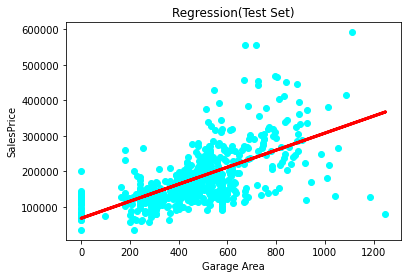

In [8]:
# Plot a graph with X_test vs y_test
plt.scatter(X_test,y_test,color="aqua")
# Regressior line showing
plt.plot(X_test,regressor.predict(X_test),color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('Garage Area')
plt.ylabel('SalesPrice')
plt.show()

# Multiple Linear Regression
Select all features.

In [9]:
X1 = np.array(df.drop('SalesPrice', axis=1))
y1 = np.array(df['SalesPrice'])
print(X1.shape) # Vewing the shape of X
print(y1.shape) # Vewing the shape of y

(2930, 304)
(2930,)


## Rescale the input features. Use MinMaxScaler.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

## Train test split.

In [0]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

## Fit regression model.

In [12]:
regressor = linear_model.LinearRegression()

regressor.fit(X1_train,y1_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [13]:
y1_train_pred = regressor.predict(X1_train)
print("Train:", r2_score(y1_train,y1_train_pred))

y1_pred = regressor.predict(X1_test)
print("Test:", r2_score(y1_test,y1_pred))

Train: 0.9360861235232011
Test: -1.8819873380681464e+18


## Print the regression coefficients.

In [22]:
i = 0
while(i < 304):
  print('Regressor coeffients for multiple linear regression:',regressor.coef_[i])
  i = i+1

Regressor coeffients for multiple linear regression: -12266.415233952912
Regressor coeffients for multiple linear regression: -2426.80465018656
Regressor coeffients for multiple linear regression: 134491.15883359985
Regressor coeffients for multiple linear regression: 60145.133425159875
Regressor coeffients for multiple linear regression: 48140.8853087327
Regressor coeffients for multiple linear regression: 47009.35828385444
Regressor coeffients for multiple linear regression: 4206.616466031937
Regressor coeffients for multiple linear regression: 41742.70654352408
Regressor coeffients for multiple linear regression: -2254929889296801.0
Regressor coeffients for multiple linear regression: -609678067167799.4
Regressor coeffients for multiple linear regression: -933294865648346.9
Regressor coeffients for multiple linear regression: 2441109430375976.0
Regressor coeffients for multiple linear regression: -1.2248780657565712e+16
Regressor coeffients for multiple linear regression: -531269314

# Ridge Regression
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

## Use cross-validation to estimate alpha. Set the fold size to 5.

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
kfold = KFold(n_splits=5)
max = 0
bestalpha = 0
for train_index, test_index in kfold.split(X1_train):
  alphas=[1e-3, 1e-2, 1e-1, 1, 2, 5, 8, 10]
  for i in alphas:
    clf = linear_model.LinearRegression()
    clf = RidgeCV([i]).fit(X1_train[train_index],y1_train[train_index])
    score = r2_score(y1_train[test_index],clf.predict(X1_train[test_index]))
    if(score > max):
      max = score
      bestalpha = i
  

## Calculate the train and test R2.

In [16]:
clf = RidgeCV([bestalpha]).fit(X1_train,y1_train)
y1_train_pred = clf.predict(X1_train)
print("Train:", r2_score(y1_train,y1_train_pred))

y1_pred = clf.predict(X1_test)
print("Test:", r2_score(y1_test,y1_pred))

Train: 0.9351619870190826
Test: 0.9120730435708386


## Print the best alpha.

In [17]:
print("Alpha:", bestalpha) #bestalpha calculated in k-fold cell.

Alpha: 0.1


## Print the regression coefficients.

In [24]:
i = 0
while(i < 304):
  print('Regressor coeffients for multiple linear regression:',clf.coef_[i])
  i = i+1

Regressor coeffients for multiple linear regression: -11537.809807844897
Regressor coeffients for multiple linear regression: -9959.318131083653
Regressor coeffients for multiple linear regression: 119972.55819773597
Regressor coeffients for multiple linear regression: 62097.51847140452
Regressor coeffients for multiple linear regression: 46648.07399916497
Regressor coeffients for multiple linear regression: 44597.22013983965
Regressor coeffients for multiple linear regression: 4340.150381187639
Regressor coeffients for multiple linear regression: 41441.90114289422
Regressor coeffients for multiple linear regression: 106966.39751113346
Regressor coeffients for multiple linear regression: 26520.28400163795
Regressor coeffients for multiple linear regression: -7658.735694715811
Regressor coeffients for multiple linear regression: 102503.68156954861
Regressor coeffients for multiple linear regression: 113893.07146329356
Regressor coeffients for multiple linear regression: 71280.3526287406